In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/ClusteringHSS.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset for initial inspection
data.head()

,ID,Gender_Code,Region,Income,Spending
0,1,Female,Rural,20.0,15.0
1,2,Male,Rural,5.0,12.0
2,3,Female,Urban,28.0,18.0
3,4,Male,Urban,40.0,10.0
4,5,Male,Urban,42.0,9.0


## Data Preprocessing

In [2]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display the count of missing values for each column
missing_values

ID             0
Gender_Code    6
Region         6
Income         6
Spending       5
dtype: int64

In [3]:
from sklearn.impute import SimpleImputer

# Imputers for categorical and continuous data
cat_imputer = SimpleImputer(strategy="most_frequent")
cont_imputer = SimpleImputer(strategy="median")

# Imputing categorical columns (Gender_Code, Region)
data['Gender_Code'] = cat_imputer.fit_transform(data[['Gender_Code']])
data['Region'] = cat_imputer.fit_transform(data[['Region']])

# Imputing continuous columns (Income, Spending)
data['Income'] = cont_imputer.fit_transform(data[['Income']])
data['Spending'] = cont_imputer.fit_transform(data[['Spending']])

# Check if there are any missing values left
remaining_missing_values = data.isnull().sum()

# Display the updated dataset and check for remaining missing values
data.head(), remaining_missing_values

(   ID Gender_Code Region  Income  Spending
 0   1      Female  Rural    20.0      15.0
 1   2        Male  Rural     5.0      12.0
 2   3      Female  Urban    28.0      18.0
 3   4        Male  Urban    40.0      10.0
 4   5        Male  Urban    42.0       9.0,
 ID             0
 Gender_Code    0
 Region         0
 Income         0
 Spending       0
 dtype: int64)

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_categorical = encoder.fit_transform(data[['Gender_Code', 'Region']])

# Create a DataFrame from the encoded categorical variables
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(['Gender_Code', 'Region']))

# Standardizing continuous variables
scaler = StandardScaler()
scaled_continuous = scaler.fit_transform(data[['Income', 'Spending']])

# Create a DataFrame from the standardized continuous variables
scaled_continuous_df = pd.DataFrame(scaled_continuous, columns=['Income', 'Spending'])

# Combine the encoded and scaled data
preprocessed_data = pd.concat([data['ID'], encoded_categorical_df, scaled_continuous_df], axis=1)

# Display the first few rows of the preprocessed dataset
preprocessed_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,ID,Gender_Code_Female,Gender_Code_Male,Region_Rural,Region_Urban,Income,Spending
0,1,1.0,0.0,1.0,0.0,-0.451187,0.813355
1,2,0.0,1.0,1.0,0.0,-1.576289,0.159262
2,3,1.0,0.0,0.0,1.0,0.148868,1.467447
3,4,0.0,1.0,0.0,1.0,1.048950,-0.276799
4,5,0.0,1.0,0.0,1.0,1.198963,-0.494830


## EDA

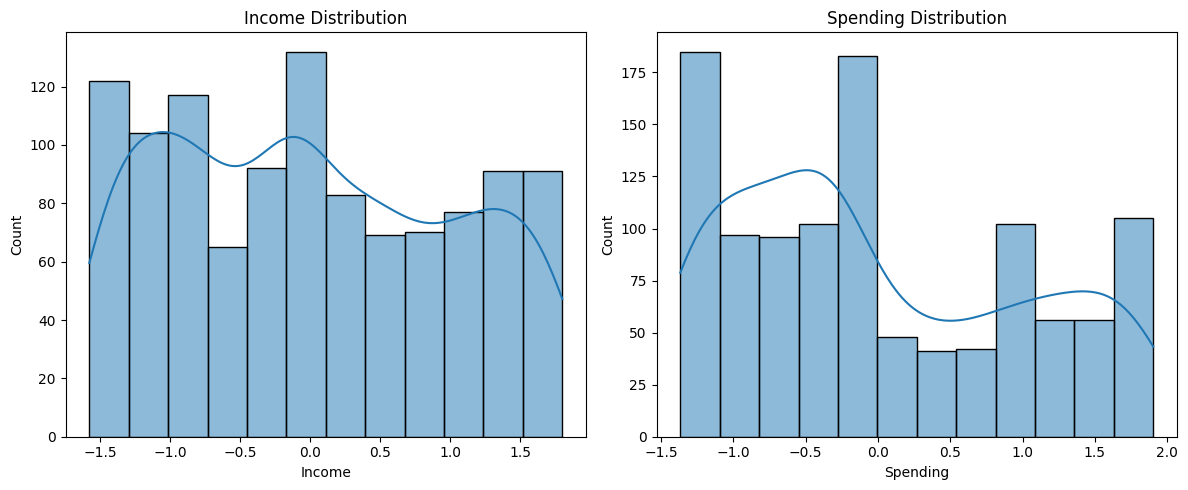

,Income,Spending
count,1.113000e+03,1.113000e+03
mean,-1.212966e-16,3.830419e-17
std,1.000450e+00,1.000450e+00
min,-1.576289e+00,-1.366953e+00
25%,-9.012274e-01,-9.308915e-01
50%,-7.615247e-02,-2.767992e-01
75%,8.239293e-01,8.133547e-01
max,1.799018e+00,1.903508e+00


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for the continuous variables
descriptive_stats = preprocessed_data[['Income', 'Spending']].describe()

# Plotting distributions and relationships
plt.figure(figsize=(12, 5))

# Distribution of Income
plt.subplot(1, 2, 1)
sns.histplot(preprocessed_data['Income'], kde=True)
plt.title('Income Distribution')

# Distribution of Spending
plt.subplot(1, 2, 2)
sns.histplot(preprocessed_data['Spending'], kde=True)
plt.title('Spending Distribution')

plt.tight_layout()
plt.show()

descriptive_stats

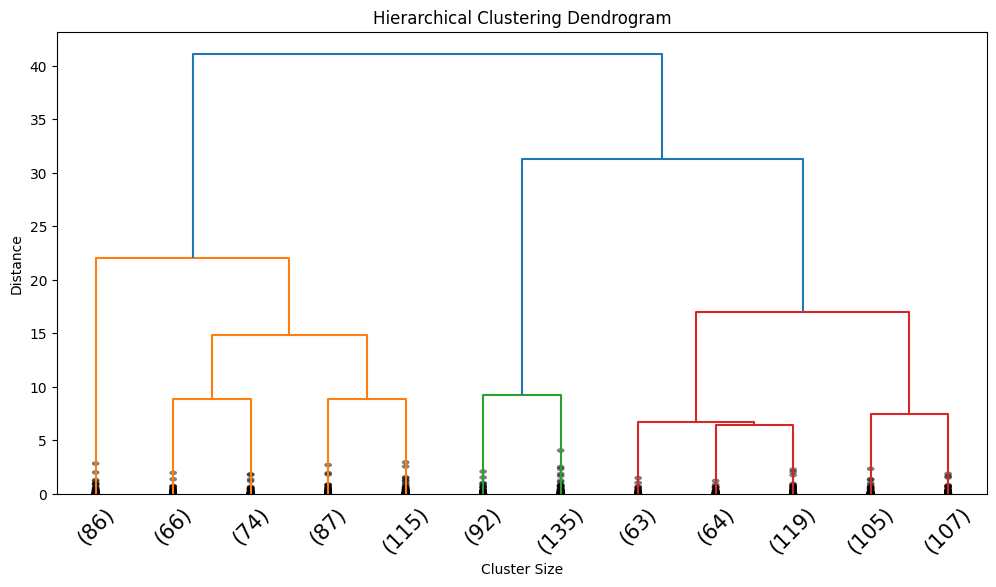

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(preprocessed_data[['Income', 'Spending']], method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

## Clustering

In [7]:
from scipy.cluster.hierarchy import fcluster

# Choosing the number of clusters based on the dendrogram
# We decide to cut the dendrogram at a distance that forms a reasonable number of clusters
# Here, we choose a distance threshold to form clusters
distance_threshold = 6
clusters = fcluster(Z, distance_threshold, criterion='distance')

# Adding the cluster labels to our preprocessed data
clustered_data = preprocessed_data.copy()
clustered_data['Cluster'] = clusters

# Display the first few rows with cluster labels
clustered_data.head()

,ID,Gender_Code_Female,Gender_Code_Male,Region_Rural,Region_Urban,Income,Spending,Cluster
0,1,1.0,0.0,1.0,0.0,-0.451187,0.813355,5
1,2,0.0,1.0,1.0,0.0,-1.576289,0.159262,3
2,3,1.0,0.0,0.0,1.0,0.148868,1.467447,4
3,4,0.0,1.0,0.0,1.0,1.048950,-0.276799,7
4,5,0.0,1.0,0.0,1.0,1.198963,-0.494830,7


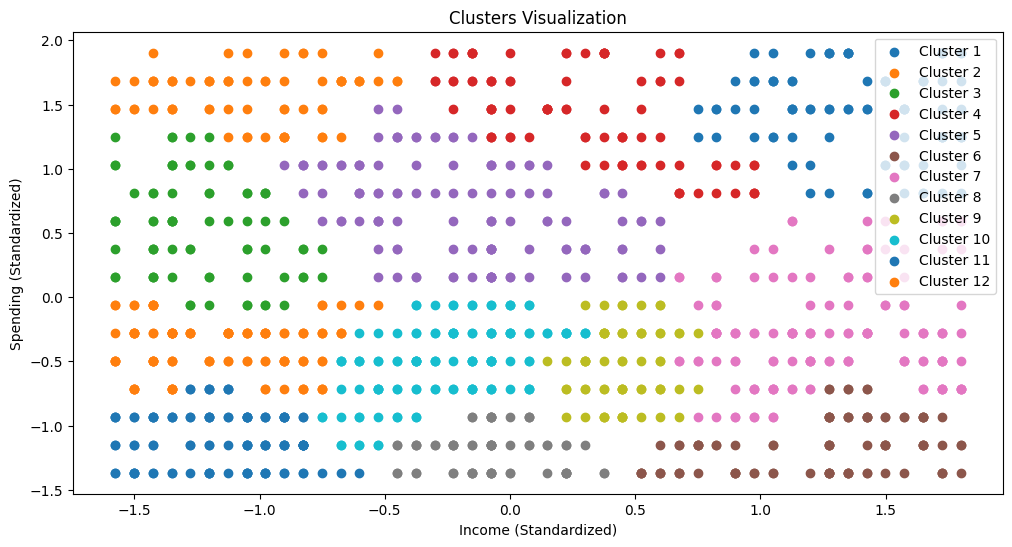

,ID,Gender_Code_Female,Gender_Code_Male,Region_Rural,Region_Urban,Income,Spending
Cluster,,,,,,,
1,521.732558,0.476744,0.523256,0.011628,0.988372,1.376014,1.439559
2,619.696970,0.606061,0.393939,1.000000,0.000000,-1.030785,1.583069
3,533.297297,0.567568,0.432432,1.000000,0.000000,-1.227608,0.545236
4,578.321839,0.482759,0.517241,0.229885,0.770115,0.291122,1.429855
5,491.208696,0.478261,0.521739,0.591304,0.408696,-0.182466,0.671161
6,523.706522,0.369565,0.630435,0.010870,0.989130,1.226683,-1.158402
7,559.985185,0.414815,0.585185,0.000000,1.000000,1.270081,-0.278414
8,495.555556,0.476190,0.523810,0.603175,0.396825,-0.073771,-1.197373
9,549.937500,0.453125,0.546875,0.000000,1.000000,0.453583,-0.532304


In [8]:
# Statistical Summary of each cluster
cluster_summary = clustered_data.groupby('Cluster').mean()

# Plotting the clusters
plt.figure(figsize=(12, 6))

# Plot for Income vs. Spending for each cluster
for cluster in cluster_summary.index:
    plt.scatter(clustered_data[clustered_data['Cluster'] == cluster]['Income'],
                clustered_data[clustered_data['Cluster'] == cluster]['Spending'],
                label=f'Cluster {cluster}')

plt.title('Clusters Visualization')
plt.xlabel('Income (Standardized)')
plt.ylabel('Spending (Standardized)')
plt.legend()
plt.show()

cluster_summary